<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/camila_fnirs_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Effect size* **d-Cohen**: Mãe-Estranha bêbes de 6M

In [ ]:
#@markdown imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.precision', 4)

# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Data Gattering


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen_ME_06M.xlsx",sheet_name='d_Cohen_ME_hbo')
df = df.melt(var_name='Channel', value_name='d_Cohen_ME_hbo', value_vars=df.columns)

for sheet in ['d_Cohen_ME_hbr']:
  temp = pd.read_excel("/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen_ME_06M.xlsx",sheet_name=sheet)
  temp = temp.melt(var_name='Channel', value_name=sheet, value_vars=temp.columns)
  df = pd.concat([df,temp[[sheet]]],axis=1)

df.columns = ['Channel', 'ME_HBO', 'ME_HBR']
df.head()

,Channel,ME_HBO,ME_HBR
0,S1_D1 1,4.5127,-1.3815
1,S1_D3 2,0.3626,-0.6602
2,S1_D4 3,1.9754,-3.8934
3,S1_D6 4,4.0315,-3.4333
4,S2_D2 5,0.3181,-3.9320


In [ ]:
df.describe()

,ME_HBO,ME_HBR
count,28.0000,28.0000
mean,-0.4043,-0.9250
std,2.3996,2.6787
min,-4.9865,-5.8819
25%,-2.1532,-3.0703
50%,-0.6961,-0.5103
75%,1.1702,0.4112
max,4.5127,4.8198


In [ ]:
ME_Actived = []
ME_Intensity = []

for index, row in df.iterrows():
  if row['ME_HBO'] > 0.8 and row['ME_HBR'] < -0.8:
    ME_Actived.append('True')
    if row['ME_HBO'] > df['ME_HBO'].quantile(0.90) and \
    row['ME_HBR'] < df['ME_HBR'].quantile(0.10):
      ME_Intensity.append('(***)')
    elif row['ME_HBO'] > df['ME_HBO'].quantile(0.75) and \
    row['ME_HBR'] < df['ME_HBR'].quantile(0.25):
      ME_Intensity.append('(**)')
    else:
      ME_Intensity.append('(*)')
  else:
    ME_Intensity.append('')
    ME_Actived.append('')

df['Actived'] = ME_Actived
df['Level'] = ME_Intensity

df.style.set_properties(**{'text-align': 'center'})


,Channel,ME_HBO,ME_HBR,Actived,Level
0,S1_D1 1,4.512704,-1.381464,True,(*)
1,S1_D3 2,0.362605,-0.660155,,
2,S1_D4 3,1.975434,-3.893408,True,(**)
3,S1_D6 4,4.031509,-3.433263,True,(**)
4,S2_D2 5,0.318075,-3.932033,,
5,S2_D4 6,-1.623748,-3.015983,,
6,S2_D5 7,-1.971122,1.920222,,
7,S2_D7 8,0.104360,0.214731,,
8,S3_D5 9,0.130296,-2.135522,,
9,S3_D7 10,-1.756487,-0.322232,,


In [ ]:
df['Ch_nr'] = df.Channel.apply(lambda x: x.split(' ')[1])
df['Channel'] = df.Channel.apply(lambda x: x.split(' ')[0])

df = df[['Channel', 'Ch_nr',
         'ME_HBO', 'ME_HBR', 'Actived', 'Level']]

df

,Channel,Ch_nr,ME_HBO,ME_HBR,Actived,Level
0,S1_D1,1,4.5127,-1.3815,True,(*)
1,S1_D3,2,0.3626,-0.6602,,
2,S1_D4,3,1.9754,-3.8934,True,(**)
3,S1_D6,4,4.0315,-3.4333,True,(**)
4,S2_D2,5,0.3181,-3.9320,,
5,S2_D4,6,-1.6237,-3.0160,,
6,S2_D5,7,-1.9711,1.9202,,
7,S2_D7,8,0.1044,0.2147,,
8,S3_D5,9,0.1303,-2.1355,,
9,S3_D7,10,-1.7565,-0.3222,,


In [ ]:
from IPython.display import display, Latex, HTML
import warnings

def gera_df_stats_latex(df_stats, titulo):

  warnings.filterwarnings('ignore')
  # latex_table = df_stats.style.to_latex(hrules=True)
  latex_table = df_stats.to_latex(index=None)
  # display(Latex(latex_table))

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  warnings.filterwarnings('default')
  return latex_table

In [ ]:
latex_table = gera_df_stats_latex(df,'dCohen-test values')
display(Latex(latex_table))

<IPython.core.display.Latex object>

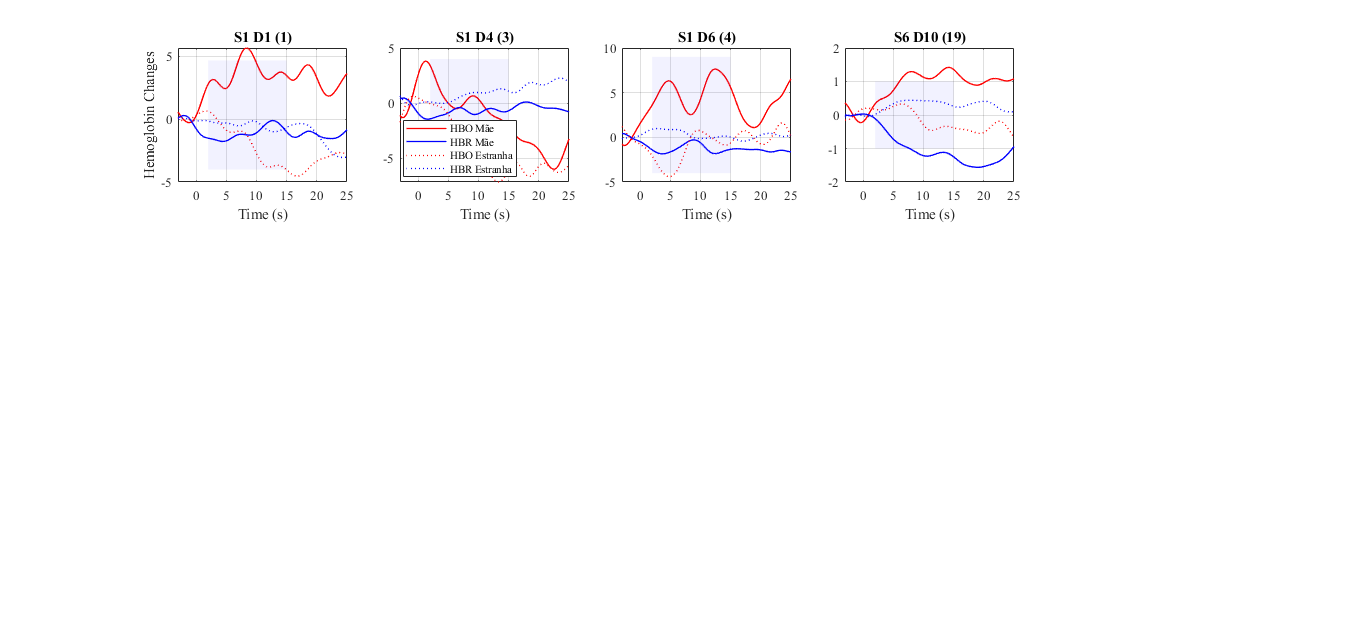

In [ ]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen_06M.png')

![imagem](https://github.com/Rogerio-mack/work/blob/main/x.png?raw=1)

![imagem]("/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen_ME.png")

In [ ]:
/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/d_Cohen_ME.png